# Home Work 2  
## "Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск"

Для выполнения домашнего задания будем использовать данные из файла Lesson_2_extended.ipynb (в материалах к вебинару):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(567)

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

**Нормализация [0, 1]**

In [4]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [5]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [6]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

**Стандартизация**

In [7]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [8]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

**Функция расчета средней квадратичной ошибки**

In [9]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

**Градиентный спуск**

In [10]:
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

**Cтохастический градиентный спуск**

In [11]:
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
#    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            err = calc_mse(y, np.dot(X, W))
            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
#     
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

### Задание 1:  

Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.


In [12]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg_=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg_ * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [13]:
regs = np.linspace(0, 10, 51)

In [14]:
W_by_lambda = [gradient_descent_reg_l2(X_st, y, iterations=1000, eta=1e-2, reg_=reg_) for reg_ in regs]

In [15]:
W_obs = dict()
for i in range(4):
    W_obs[i] = [W_by_lambda[obs][i] for obs in range(len(regs))]

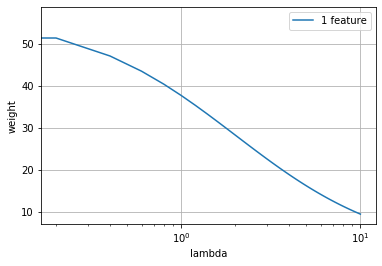

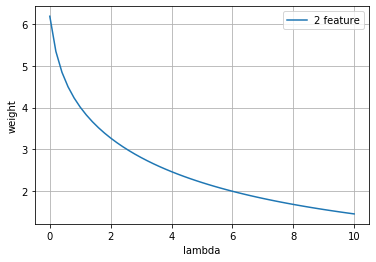

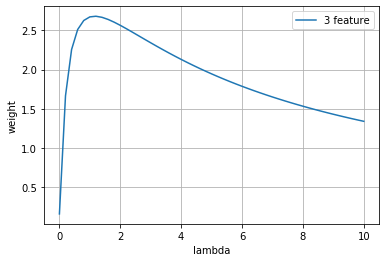

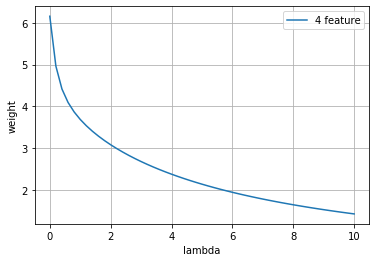

In [16]:
plt.xscale('log')
#plt.grid()
for i in range(4):
    plt.plot(regs, W_obs[i])
    plt.xlabel("lambda")
    plt.ylabel("weight")
    plt.legend([f'{i + 1} feature'])
    plt.grid()
    plt.show()

**Вывод:** При увеличении коэффициента регуляризации $\lambda$ весовые коэффициенты модели уменьшаются по экспоненте.

### Задание 2:  

Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

**L1 регуляризация**  
$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$  
**Производная**  
$$\frac{d}{dx}{(x^2)}=2x$$

In [17]:
def gradient_descent_reg1(X, y, iterations, eta=1e-4, reg_=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y)
        # ИЗМЕНЕНИЯ
        dReg = (reg_ /2 * W/abs(W)) #производная
        
        W -= eta * (dQ + dReg)

    return W

In [18]:
W1 = gradient_descent_reg1(X_st, y, iterations=5000, eta=1e-2, reg_=1e-4)

Сравним веса, полученные разными методами:

In [19]:
W = stohastic_gradient_descent(X_st, y, iterations=5000, batch_size=4, eta=1e-2)

In [20]:
W2 = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg_=1e-4)

In [21]:
print(f'Стохастический градиентный спуск: {W}\n')
print(f'L2 регуляризация: {W2}\n')
print(f'L1 регуляризация: {W1}\n')

Стохастический градиентный спуск: [57.052469    6.12644888 -0.97679353  7.1240473 ]

L2 регуляризация: [56.49717514  6.30231246 -0.35421656  6.56976415]

L1 регуляризация: [56.499975    6.30295697 -0.3559203   6.57111836]



### Задание 3  
* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**Ответ:**  
Можно, но это избыточное решение. Тем более каждый метод лучше работает с определёнными моделями машинного обучения.